In [48]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [49]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments = pd.read_csv('installments_payments.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')


In [50]:
#group by bureau balance 
bureau_balance_agg=bureau_balance.groupby(['SK_ID_BUREAU']).agg({
    'MONTHS_BALANCE' : 'mean',
    'STATUS' : 'first'}).reset_index()

In [51]:
#divide status in bureau_balance to 0 and 1 
map_status = {'C' :1,
              'X' :1,
              '0' :1,
              '1' :0,
              '2' :0,
              '3' :0,
              '4' :0,
              '5' :0}
bureau_balance_agg['STATUS'] = bureau_balance_agg['STATUS'].map(map_status)
bureau_balance_agg['STATUS'].value_counts()


STATUS
1    809934
0      7461
Name: count, dtype: int64

In [52]:
#merge bureau with bureau balance 
df_bureau = bureau.merge(bureau_balance_agg,how='inner',on=['SK_ID_BUREAU'])
df_bureau.head()

df_bureau_agg=df_bureau.groupby(['SK_ID_CURR']).agg({
    'SK_ID_BUREAU' : 'first',
    'CREDIT_ACTIVE': 'last',
    'CREDIT_CURRENCY' : 'last',
    'DAYS_CREDIT' : 'median',
    'CREDIT_DAY_OVERDUE' : 'median',
    'DAYS_CREDIT_ENDDATE' : 'median',
    'DAYS_ENDDATE_FACT' : 'median',
    'AMT_CREDIT_MAX_OVERDUE' :'median',
    'CNT_CREDIT_PROLONG' : 'median',
    'AMT_CREDIT_SUM' : 'median',
    'AMT_CREDIT_SUM_DEBT' : 'median',
    'AMT_CREDIT_SUM_LIMIT': 'median',
    'AMT_CREDIT_SUM_OVERDUE' :'median',
    'CREDIT_TYPE': 'last',
    'DAYS_CREDIT_UPDATE' : 'median',
    'AMT_ANNUITY' : 'median',
    'MONTHS_BALANCE' : 'median',
    'STATUS': 'first'
}).reset_index()

df_bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,100001,5896630,Active,currency 1,-857.0,0.0,-179.0,-715.0,NaN,0.0,168345.0,0.00,0.0,0.0,Consumer credit,-155.0,0.0,-14.00,1
1,100002,6158904,Closed,currency 1,-1042.5,0.0,-424.5,-939.0,40.5,0.0,54130.5,0.00,0.0,0.0,Credit card,-402.5,0.0,-26.00,1
2,100005,6735200,Active,currency 1,-137.0,0.0,122.0,-123.0,0.0,0.0,58500.0,25321.50,0.0,0.0,Consumer credit,-31.0,0.0,-2.00,1
3,100010,5576630,Closed,currency 1,-1939.5,0.0,-119.5,-1138.0,NaN,0.0,495000.0,174003.75,0.0,0.0,Loan for business development,-578.0,NaN,-46.00,1
4,100013,5922083,Closed,currency 1,-1835.0,0.0,-999.0,-1168.0,19305.0,0.0,391770.0,0.00,NaN,0.0,Car loan,-882.0,0.0,-29.75,1


In [53]:
df_app_train = app_train.merge(df_bureau_agg, how='inner', on='SK_ID_CURR')
df_app_test  = app_test.merge(df_bureau_agg, how='inner',on ='SK_ID_CURR') 

In [54]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,54130.5,0.00,0.0,0.0,Credit card,-402.5,0.0,-26.0,1
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,495000.0,174003.75,0.0,0.0,Loan for business development,-578.0,NaN,-46.0,1
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,360000.0,122735.07,135000.0,0.0,Consumer credit,-26.5,27000.0,-8.0,1
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,0.0,331875.0,0.00,0.0,0.0,Consumer credit,-520.5,17437.5,-29.0,1
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,0.0,675000.0,0.00,0.0,0.0,Credit card,-169.0,NaN,-3.0,1


In [55]:
print(app_train.TARGET.value_counts())

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [56]:
def func_info(data):

    list_column =[]
    list_type   =[]
    list_len    =[] 
    list_null   =[]
    list_persen_null =[]
    list_value_count = []
    list_len_unique=[]

    for column in data.columns:

        column_name = column
        column_type = data[column].dtype
        column_len  = data[column].notnull().sum()
        column_null = data[column].isnull().sum()
        column_persen = round(column_null/data.shape[0] *100,2)

        list_column.append(column_name)
        list_type.append(column_type)
        list_len.append(column_len)
        list_null.append(column_null)
        list_persen_null.append(column_persen)

    df_info = pd.DataFrame({'column' : list_column,
                          'dtype'  : list_type,
                          'length' : list_len,
                          'null_count': list_null,
                          'null_percents': list_persen_null})
    
    for index,row in df_info.iterrows() :
        if row['dtype'] == 'object':
            value_count = data[row.column].value_counts().reset_index()
            value_count = value_count.values.tolist()
            len_unique = len(value_count)
        else:
            value_count = None
            len_unique = None

        list_value_count.append(value_count)
        list_len_unique.append(len_unique)

    df_info['value_count'] = list_value_count
    df_info['len_unique'] = list_len_unique
    
    return df_info

In [57]:
info_train = func_info(df_app_train)
info_test = func_info(df_app_test)

#info_train_sort = info_train[(info_train.null_count>0)].sort_values(by = 'null_count',ascending=False)
#info_test_sort  = info_test[(info_test.null_count>0)].sort_values(by='null_count',ascending=False)

print('---------------------info_train--------------')
display(info_train.head())
print('---------------------info_test--------------')
display(info_test.head())

---------------------info_train--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
0,SK_ID_CURR,int64,92231,0,0.0,None,NaN
1,TARGET,int64,92231,0,0.0,None,NaN
2,NAME_CONTRACT_TYPE,object,92231,0,0.0,"[[Cash loans, 91849], [Revolving loans, 382]]",2.0
3,CODE_GENDER,object,92231,0,0.0,"[[F, 59935], [M, 32296]]",2.0
4,FLAG_OWN_CAR,object,92231,0,0.0,"[[N, 58979], [Y, 33252]]",2.0


---------------------info_test--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
0,SK_ID_CURR,int64,42311,0,0.0,None,NaN
1,NAME_CONTRACT_TYPE,object,42311,0,0.0,"[[Cash loans, 41933], [Revolving loans, 378]]",2.0
2,CODE_GENDER,object,42311,0,0.0,"[[F, 28763], [M, 13548]]",2.0
3,FLAG_OWN_CAR,object,42311,0,0.0,"[[N, 27674], [Y, 14637]]",2.0
4,FLAG_OWN_REALTY,object,42311,0,0.0,"[[Y, 29253], [N, 13058]]",2.0


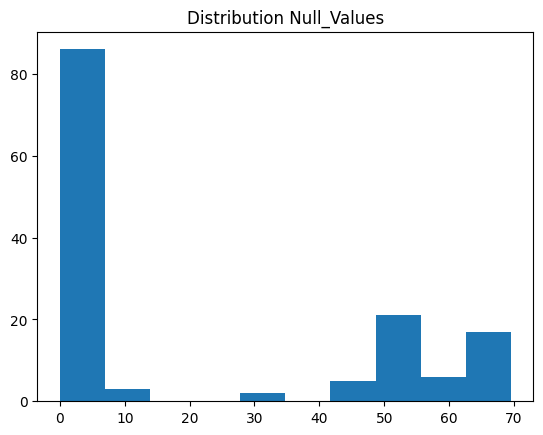

In [58]:
plt.hist(info_train.null_percents)
plt.title('Distribution Null_Values')
plt.show()


In [59]:
#delete some column that has null_percent more than 5 percent 
first_filter_column = info_train[info_train['null_percents'] < 5]
#delete column object that too long unique value
second_filter_column = first_filter_column[~((first_filter_column['dtype'] == 'object') &
                        (first_filter_column.len_unique > 5))]

#df_app_train temporary selected column
df_app_train_selected = df_app_train[second_filter_column['column'].values.tolist()]
df_app_train_selected.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1042.5,0.0,-424.5,0.0,54130.5,0.00,0.0,-402.5,-26.0,1
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-1939.5,0.0,-119.5,0.0,495000.0,174003.75,0.0,-578.0,-46.0,1
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,-495.0,0.0,5441.0,0.0,360000.0,122735.07,0.0,-26.5,-8.0,1
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,-1169.5,0.0,-624.0,0.0,331875.0,0.00,0.0,-520.5,-29.0,1
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,-195.0,0.0,913.0,0.0,675000.0,0.00,0.0,-169.0,-3.0,1


# DUPLICATED DATA

In [64]:
n_duplicate = df_app_train_selected.duplicated().sum()
print('total data duplicate :' +str(n_duplicate))

total data duplicate :0


# FILL NA

In [61]:
#check how many columns that have null values
list_na = second_filter_column['column'][second_filter_column['null_count'] >0].values.tolist()
len_init = len(list_na)
for col in list_na:
    df_app_train_selected[col] = df_app_train_selected[col].fillna(df_app_train_selected[col].median()) 

df_app_train_selected_info = func_info(df_app_train_selected)
len_final = len(df_app_train_selected_info[df_app_train_selected_info['null_count'] > 0])
print('n_column that has null values before fillna :' + str(len_init) )
print('n_column that has null values after fillna  :'  + str(len_final) + '/no left')

n_column that has null values before fillna :9
n_column that has null values after fillna  :0/no left


# SPLIT DATA TO TRAIN AND TEST

In [79]:
from  sklearn.model_selection import train_test_split
no_use = ['SK_ID_CURR','TARGET']
X = df_app_train_selected.loc[:,~df_app_train_selected.columns.isin(no_use)]
y = df_app_train_selected['TARGET']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('len_x_train '+ str(len(x_train)))
print('len_x_test ' + str(len(x_test)))

len_x_train 73784
len_x_test 18447
